In [1]:
import osmnx as ox

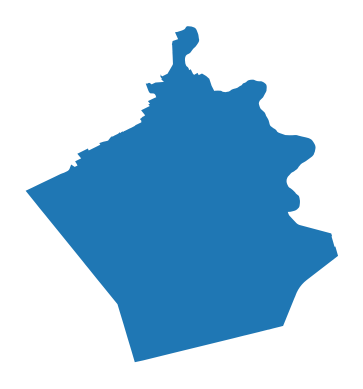

In [3]:
city = ox.geocode_to_gdf('Kitchener, Ontario, Canada')
ax = ox.project_gdf(city).plot()
_ = ax.axis('off')

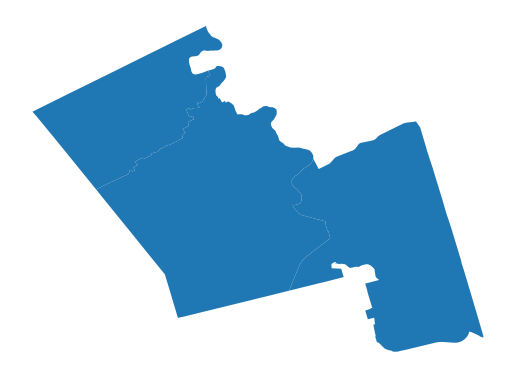

In [4]:
places = ox.geocode_to_gdf(['Waterloo, Ontario, Canada', 
                            'Kitchener, Ontario, Canada', 
                            'Cambridge, Ontario, Canada'])
places = ox.project_gdf(places)
ax = places.plot()
plot = ax.axis('off')

In [5]:
p1 = 43.512500
p2 = 43.331343
p3 = -80.632278
p4 = -80.246132

/tmp/ipykernel_8956/3592264488.py:1: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(p1,p2,p3,p4, network_type='drive')


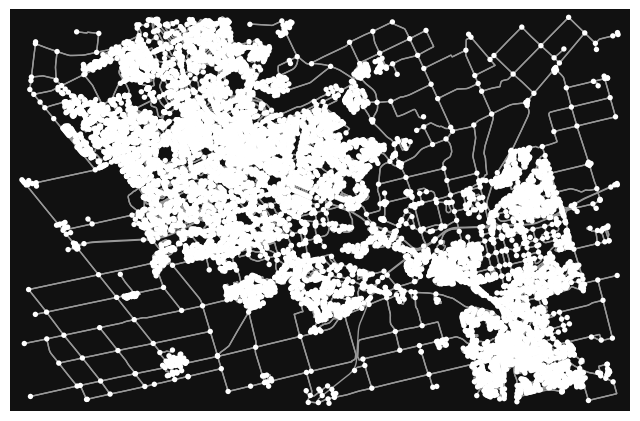

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [6]:
G = ox.graph_from_bbox((p1,p2,p3,p4), network_type='drive')
G_projected = ox.project_graph(G)
ox.plot_graph(G_projected)

In [3]:
filepath = './data/kwc.graphml'

In [8]:
ox.io.save_graphml(G, filepath)

In [5]:
G = ox.io.load_graphml(filepath)

In [6]:
Gp = ox.projection.project_graph(G)

In [9]:
# randomly sample n points spatially-constrained to the network's geometry
points = ox.utils_geo.sample_points(Gp.to_undirected(), n=100)
X = points.x.values
Y = points.y.values
X0 = X.mean()
Y0 = Y.mean()



In [11]:
# find each nearest edge to several points, and optionally return distance
edges, dists = ox.distance.nearest_edges(Gp, X, Y, return_dist=True)

In [13]:
# find the nearest edge to a single point
edge = ox.distance.nearest_edges(Gp, X0, Y0)
edge



(385016307, 385016001, 0)

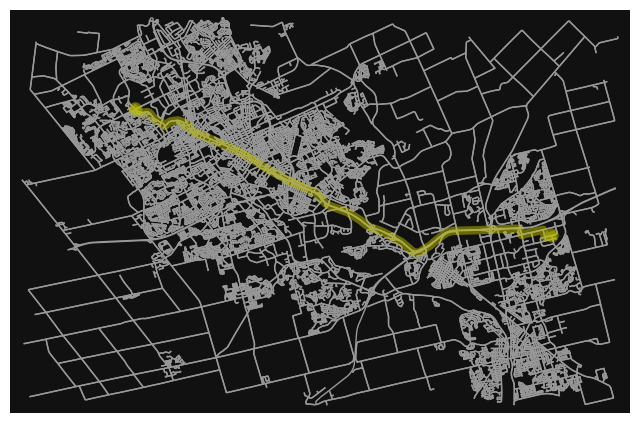

In [14]:
# find the shortest path (by distance) between these nodes then plot it
orig = list(G)[0]
dest = list(G)[120]
route = ox.routing.shortest_path(G, orig, dest, weight="length")
fig, ax = ox.plot.plot_graph_route(G, route, route_color="y", route_linewidth=6, node_size=0)

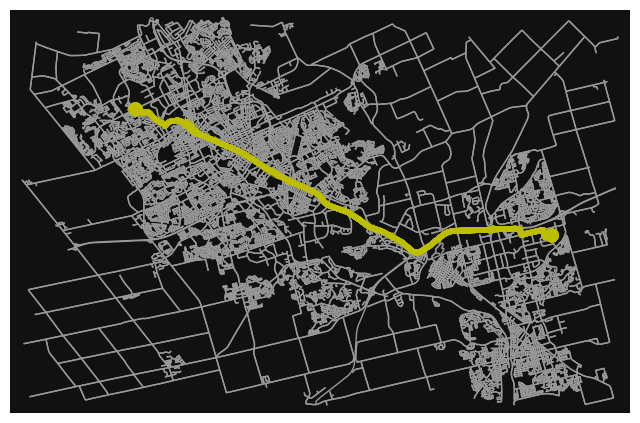

In [15]:
# Or get K shortest paths, weighted by some other attribute
routes = ox.routing.k_shortest_paths(G, orig, dest, k=30, weight="length")
fig, ax = ox.plot.plot_graph_routes(
    G, list(routes), route_colors="y", route_linewidth=4, node_size=0
)

